<a href="https://colab.research.google.com/github/Krishna5996/Machine_Learning/blob/master/Breast_Cancer_Apriori.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing important libraries**

In [0]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori

# **Mounting Drive to google colab**

In [0]:
from google.colab import  drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


# **Loading Dataset and converting it into dataframe**

In [0]:

dataset=pd.read_csv('/content/drive/My Drive/Dataset/Breast_Cancer.csv')

# **Printing feature names**

In [0]:

dataset.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

# **Printing First five rows**

In [0]:

dataset.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


# **Colloecting each item from every transactions and printing True if it is present in perticular transaction otherwise showing false**

In [0]:

te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)
df

,,_,a,c,d,e,f,g,h,i,l,m,n,o,p,r,s,t,u,v,w,x,y
0,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,True,False,True,False,False,True,False,True,False,False,True,True,False,False,True,False,False,False,False,False,False
2,False,True,True,False,True,True,False,False,False,True,False,True,True,False,False,True,True,False,True,False,False,False,False
3,False,True,True,False,False,True,False,False,False,False,False,True,True,False,False,True,False,True,True,False,False,True,False
4,False,True,True,False,False,True,False,False,False,True,False,True,True,False,True,True,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
565,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
566,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
567,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


# **Applying apriori algorithm minimum support as 0.02**

In [0]:

frequent_itemsets = apriori(df, min_support=0.02, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.052724,(_)
1,0.040422,(a)
2,0.021090,(c)
3,0.049209,(e)
4,0.029877,(i)
...,...,...
264,0.021090,"(a, e, t, _, s, n)"
265,0.021090,"(a, e, o, _, t, s)"
266,0.021090,"(a, o, _, t, s, n)"
267,0.021090,"(e, o, _, t, s, m)"


# **Metadata of frequent itemset**

In [0]:
frequent_itemsets['support'].describe()

count    269.000000
mean       0.026545
std        0.006343
min        0.021090
25%        0.021090
50%        0.024605
75%        0.029877
max        0.052724
Name: support, dtype: float64

# **Finding basic association rules like support,confidence and lift. Support is probablity. Confidence is conditional probablity. Lift is how much consequents are influenced by antecedents.Value below minimum threshold are are neglected.**

In [0]:
from mlxtend.frequent_patterns import association_rules
a_r = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.7)
a_r

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(a),(_),0.040422,0.052724,0.038664,0.956522,18.142029,0.036533,21.787346
1,(_),(a),0.052724,0.040422,0.038664,0.733333,18.142029,0.036533,3.598418
2,(c),(_),0.021090,0.052724,0.021090,1.000000,18.966667,0.019978,inf
3,(e),(_),0.049209,0.052724,0.049209,1.000000,18.966667,0.046615,inf
4,(_),(e),0.052724,0.049209,0.049209,0.933333,18.966667,0.046615,14.261863
...,...,...,...,...,...,...,...,...,...
1805,"(s, n, t)","(e, o, _)",0.026362,0.031634,0.022847,0.866667,27.396296,0.022013,7.262742
1806,"(e, o)","(s, n, t, _)",0.031634,0.026362,0.022847,0.722222,27.396296,0.022013,3.505097
1807,"(n, o)","(s, e, t, _)",0.028120,0.036907,0.022847,0.812500,22.014881,0.021809,5.136497
1808,"(n, t)","(s, e, o, _)",0.031634,0.029877,0.022847,0.722222,24.173203,0.021902,3.492443


In [0]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=40)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,"(a, o, n)",(c),0.024605,0.021090,0.02109,0.857143,40.642857,0.020571,6.852373
1,(c),"(a, o, n)",0.021090,0.024605,0.02109,1.000000,40.642857,0.020571,inf
2,"(a, o, _, n)",(c),0.022847,0.021090,0.02109,0.923077,43.769231,0.020608,12.725835
3,"(a, o, n)","(c, _)",0.024605,0.021090,0.02109,0.857143,40.642857,0.020571,6.852373
4,"(c, _)","(a, o, n)",0.021090,0.024605,0.02109,1.000000,40.642857,0.020571,inf
5,(c),"(a, o, _, n)",0.021090,0.022847,0.02109,1.000000,43.769231,0.020608,inf
6,"(o, a, t, n)",(c),0.022847,0.021090,0.02109,0.923077,43.769231,0.020608,12.725835
7,"(a, o, n)","(c, t)",0.024605,0.021090,0.02109,0.857143,40.642857,0.020571,6.852373
8,"(c, t)","(a, o, n)",0.021090,0.024605,0.02109,1.000000,40.642857,0.020571,inf
9,(c),"(o, a, t, n)",0.021090,0.022847,0.02109,1.000000,43.769231,0.020608,inf


# **Selecting particular rules only**

In [0]:
rules = rules[['antecedents','consequents','support','confidence','lift']]
rules

,antecedents,consequents,support,confidence,lift
0,"(a, o, n)",(c),0.02109,0.857143,40.642857
1,(c),"(a, o, n)",0.02109,1.000000,40.642857
2,"(a, o, _, n)",(c),0.02109,0.923077,43.769231
3,"(a, o, n)","(c, _)",0.02109,0.857143,40.642857
4,"(c, _)","(a, o, n)",0.02109,1.000000,40.642857
5,(c),"(a, o, _, n)",0.02109,1.000000,43.769231
6,"(o, a, t, n)",(c),0.02109,0.923077,43.769231
7,"(a, o, n)","(c, t)",0.02109,0.857143,40.642857
8,"(c, t)","(a, o, n)",0.02109,1.000000,40.642857
9,(c),"(o, a, t, n)",0.02109,1.000000,43.769231


# **Converting it into array because matplotlib functions takes only array like inputs**

In [0]:
import numpy as np
support_arr=np.array(frequent_itemsets['support'])
support_arr

array([0.05272408, 0.04042179, 0.02108963, 0.04920914, 0.02987698,
       0.03514938, 0.03690685, 0.03690685, 0.03866432, 0.04745167,
       0.0456942 , 0.03866432, 0.02108963, 0.04920914, 0.02636204,
       0.03514938, 0.03514938, 0.03514938, 0.03866432, 0.0456942 ,
       0.0456942 , 0.02108963, 0.03514938, 0.02460457, 0.02460457,
       0.03339192, 0.02811951, 0.02636204, 0.03339192, 0.03163445,
       0.02108963, 0.02108963, 0.02108963, 0.0228471 , 0.03514938,
       0.03339192, 0.03163445, 0.03514938, 0.04217926, 0.04217926,
       0.02108963, 0.02108963, 0.02460457, 0.0228471 , 0.02811951,
       0.0228471 , 0.02460457, 0.02811951, 0.03163445, 0.02811951,
       0.02108963, 0.02987698, 0.03163445, 0.02108963, 0.03514938,
       0.03514938, 0.03339192, 0.03163445, 0.04042179, 0.02108963,
       0.03514938, 0.0228471 , 0.02460457, 0.03163445, 0.02636204,
       0.02636204, 0.03163445, 0.03163445, 0.02108963, 0.02108963,
       0.02108963, 0.0228471 , 0.03514938, 0.03339192, 0.03163

Plotting the histogram between percentage and Fre

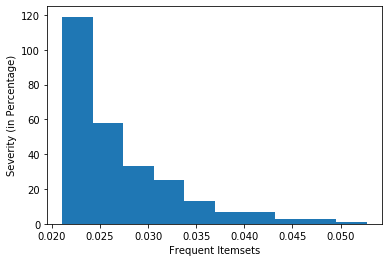

In [0]:
import matplotlib.pyplot as plt
plt.hist(support_arr)
plt.xlabel('Frequent Itemsets')
plt.ylabel('Severity (in Percentage)')
plt.show()

# **Now We will find out the top 10 features which are influencing the diagnosis feature as Maligant**

In [0]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
dataset['diagnosis']=le.fit_transform(dataset['diagnosis']) 
X = dataset.iloc[:,2:]  #independent columns
y = dataset.iloc[:,1]    #target column i.e diagnosis
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best feature

              Specs          Score
23       area_worst  112598.431564
3         area_mean   53991.655924
13          area_se    8758.504705
22  perimeter_worst    3665.035416
2    perimeter_mean    2011.102864
20     radius_worst     491.689157
0       radius_mean     266.104917
12     perimeter_se     250.571896
21    texture_worst     174.449400
1      texture_mean      93.897508
